# Chapter VIV: Backpropagation

In [1]:
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

In [2]:
xw0 = x[0] * w[0]
print(xw0)

-3.0


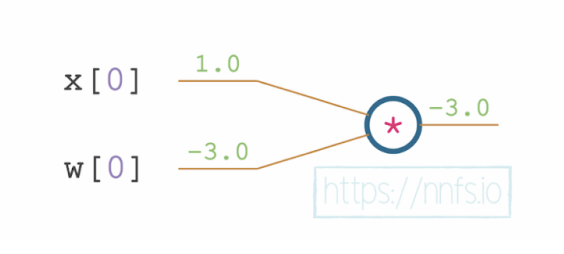

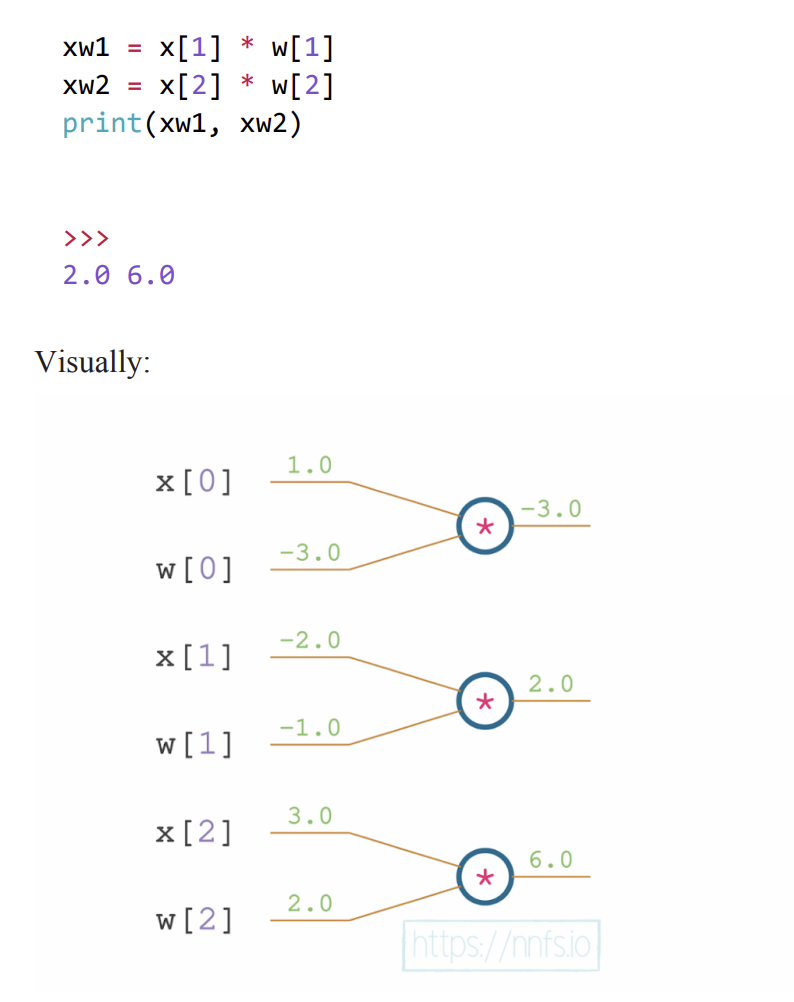

In [3]:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias
# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]
print(xw0, xw1, xw2)

-3.0 2.0 6.0


In [4]:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias
# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]
print(xw0, xw1, xw2, b)
# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b
print(z)

-3.0 2.0 6.0 1.0
6.0


In [5]:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias
# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]
print(xw0, xw1, xw2, b)
# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b
print(z)
# ReLU activation function
y = max(z, 0)
print(y)

-3.0 2.0 6.0 1.0
6.0
6.0


In [6]:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias
# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]
# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b
# ReLU activation function
y = max(z, 0)
# Backward pass
# The derivative from the next layer
dvalue = 1.0
# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print(drelu_dz)

1.0


In [8]:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias
# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]
# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b
# ReLU activation function
y = max(z, 0)
# Backward pass
# The derivative from the next layer
dvalue = 1.0
# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print(drelu_dz)
# Partial derivatives of the multiplication, the chain rule
dsum_dxw0 = 1
drelu_dxw0 = drelu_dz * dsum_dxw0
print(drelu_dxw0)

1.0
1.0


## 9.1. Categorical Cross-Entropy loss derivative code implementation

In [9]:
# Common loss class
class Loss:
    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):
        # Calculate sample losses
        sample_losses = self.forward(output, y)
        # Calculate mean loss
        data_loss = np.mean(sample_losses)
        # Return loss
        return data_loss

In [10]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)
        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
            range(samples),
            y_true
            ]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
            y_pred_clipped * y_true,
            axis=1
            )
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])
        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples

## 9.2. Softmax activation

In [11]:
# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):
        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output and
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)

            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

In [13]:
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()
    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples